In [4]:
import random
import math
import statistics as st
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
# IPython Notebook–specific; means to show in the notebook

In [6]:
help(random.gauss)

Help on method gauss in module random:

gauss(mu, sigma) method of random.Random instance
    Gaussian distribution.
    
    mu is the mean, and sigma is the standard deviation.  This is
    slightly faster than the normalvariate() function.
    
    Not thread-safe without a lock around calls.



In [7]:
data = [random.gauss(0,5) for _ in range(10000)]

# Line Plots

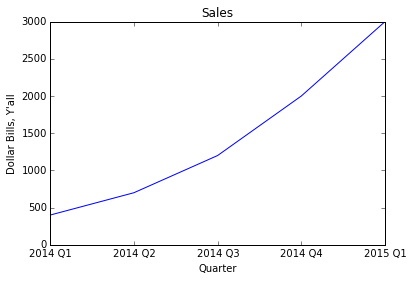

In [8]:
x1 = ['2014 Q1', '2014 Q2', '2014 Q3', '2014 Q4', '2015 Q1']
y1 = [400, 700, 1200, 2000, 3000]
plt.plot(y1)
plt.xticks(range(5), x1)
# plt.yticks(range(0, 3001, 1000),['0', '1k', '2k', '3k'])
plt.xlabel('Quarter')
plt.ylabel("Dollar Bills, Y'all")
plt.title('Sales')
plt.show()

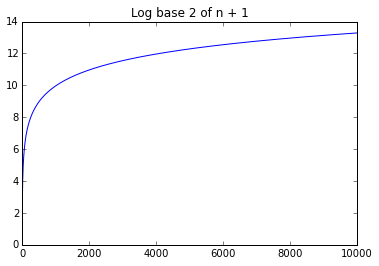

In [9]:
log_nums = [math.log2(n + 1) for n in range(10000)]
plt.plot(log_nums)
plt.title('Log base 2 of n + 1')
plt.show()

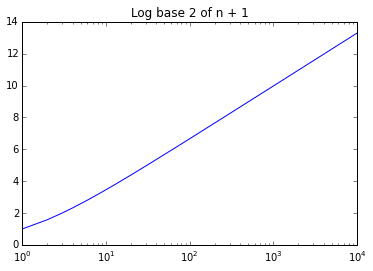

In [10]:
log_nums = [math.log2(n + 1) for n in range(10000)]
plt.plot(log_nums)
plt.title('Log base 2 of n + 1')
plt.xscale('log')
plt.show()

In [11]:
def roll2():
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    
    return die1 - die2

In [12]:
num = 0
nums = []
for _ in range(10000):
    num += roll2()
    nums.append(num)

In [13]:
num

-179

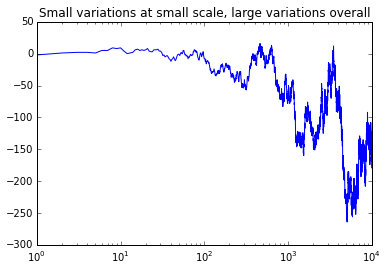

In [14]:
plt.plot(nums)
plt.xscale('log')
plt.title('Small variations at small scale, large variations overall')
plt.show()

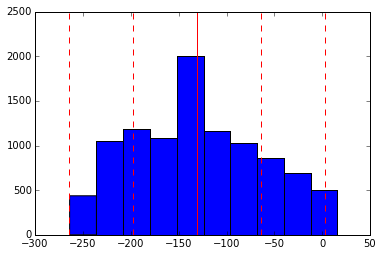

In [15]:
# plt.scatter(*zip(*tuple))
plt.hist(nums)
mean = st.mean(nums)
stdev = st.stdev(nums)
ymin, ymax = plt.ylim()

plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyle='dashed' )


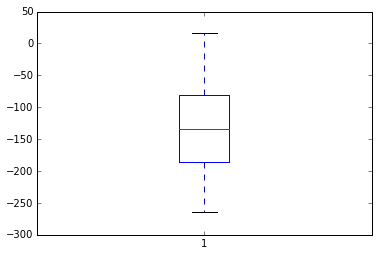

In [16]:
group1 = [random.triangular(20, 180, 100) for _ in range(10000)]
plt.boxplot(nums)
plt.show()

In [17]:
def flip_coin():
    return random.choice([0,1])

In [39]:
def n_flip_sim(n):
    num_heads = 0
    log_2_diff = []
    log_2_ratio = []
    expos_of_2 = [2**y for y in range(int(math.sqrt(n))+2)]
    flips = [flip_coin() for _ in range(n)]
    for idx, flip in enumerate(flips):
        if flip == 0:
            num_heads += 1
        if idx in expos_of_2 or idx == n - 1:
            log_2_diff.append(num_heads - (idx - num_heads))
            log_2_ratio.append(num_heads / idx)
    ret_expos = expos_of_2[:(len(log_2_diff) - 1)]
    ret_expos.append(n)
    return log_2_diff, log_2_ratio, ret_expos
    

In [41]:
diffs, ratios, expos_of_2 = n_flip_sim(100)
# print(diffs)
# print(expos_of_2)
# print(ratios)

[1, 0, 0, -2, -4, 2, 2, 5]
[1, 2, 4, 8, 16, 32, 64, 100]
[1.0, 0.5, 0.5, 0.375, 0.375, 0.53125, 0.515625, 0.5252525252525253]


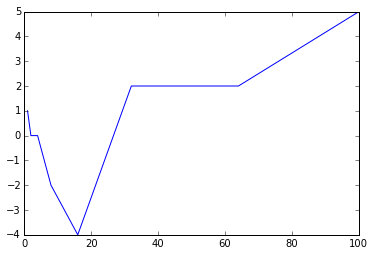

In [45]:
plt.plot(expos_of_2, diffs)
plt.show()

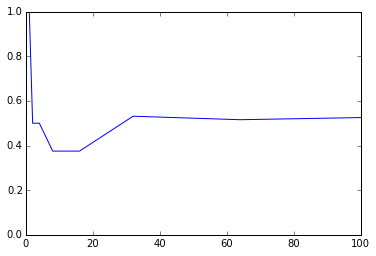

In [52]:
plt.plot(expos_of_2, ratios)
plt.ylim(0,1)
plt.show()